In [ ]:
!pip install numpy matplotlib scipy pyaca

In [2]:
import pyACA
import numpy as np
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
f_s,x = pyACA.ToolReadAudio('../audio/piano.wav')
X, f, t = pyACA.computeSpectrogram(x, f_s, iBlockLength=2048, iHopLength=512, bNormalize=True, bMagnitude=True)

In [4]:
def amplitude_to_db(x):
    return 20*np.log10(x/np.max(x))

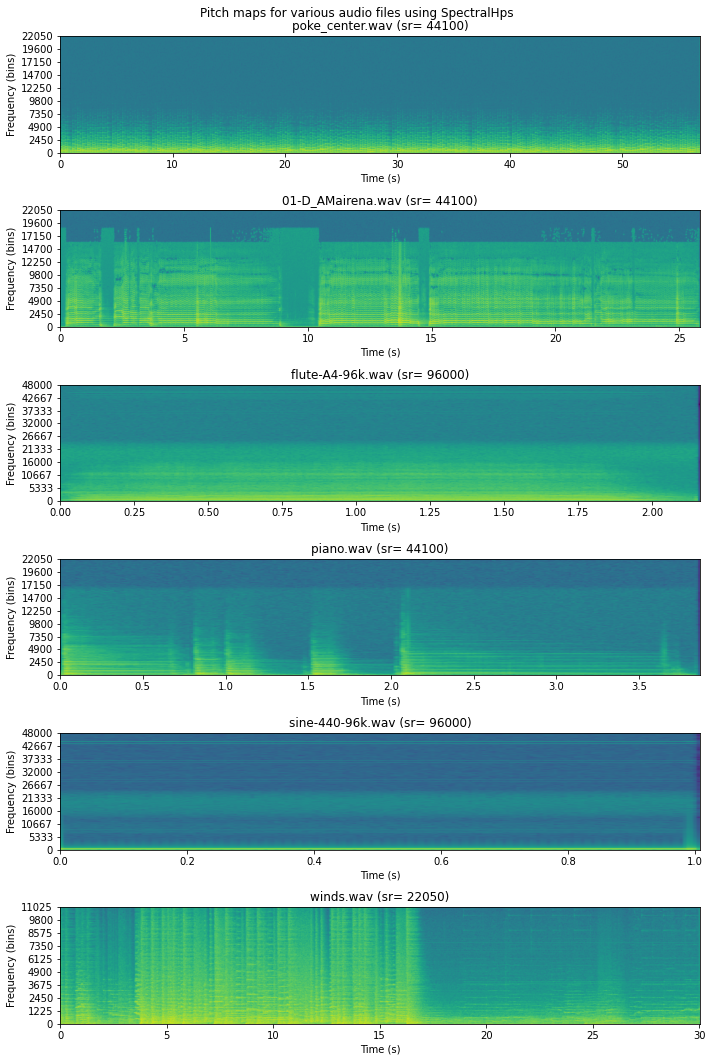

In [8]:
file_names = ['poke_center.wav','01-D_AMairena.wav','flute-A4-96k.wav','piano.wav','sine-440-96k.wav', 'winds.wav']
fig,axs = plt.subplots(len(file_names),1,figsize=(10,15))
fig.suptitle('Pitch maps for various audio files using SpectralHps')
for idx, fname in enumerate(file_names):
    f_s, x = pyACA.ToolReadAudio('../audio/'+fname)
    X, f, t = pyACA.computeSpectrogram(x, f_s, iBlockLength=2048, iHopLength=512, bNormalize=True, bMagnitude=True)
    extent = [0, t[-1], 0, f[-1]]  # Adjust the extent parameter
    axs[idx].imshow(amplitude_to_db(X), origin='lower', aspect='auto', extent=extent)
    axs[idx].set_title(fname+f" (sr= {f_s})")
    yticks = np.linspace(f[0], f[-1], 10)
    axs[idx].set_yticks(yticks)
    axs[idx].set_ylim([0, f[-1]])  # Set the y-axis limit based on the maximum frequency
    # axs[idx].set_yscale('log', base=10)
for ax in axs.flat:
    ax.set(xlabel='Time (s)', ylabel='Frequency (bins)')
fig.tight_layout()